# **K-Nearest Neighbors Classifier From Scratch in Python**
*By Cristian Leo*

**Link to Article**: 

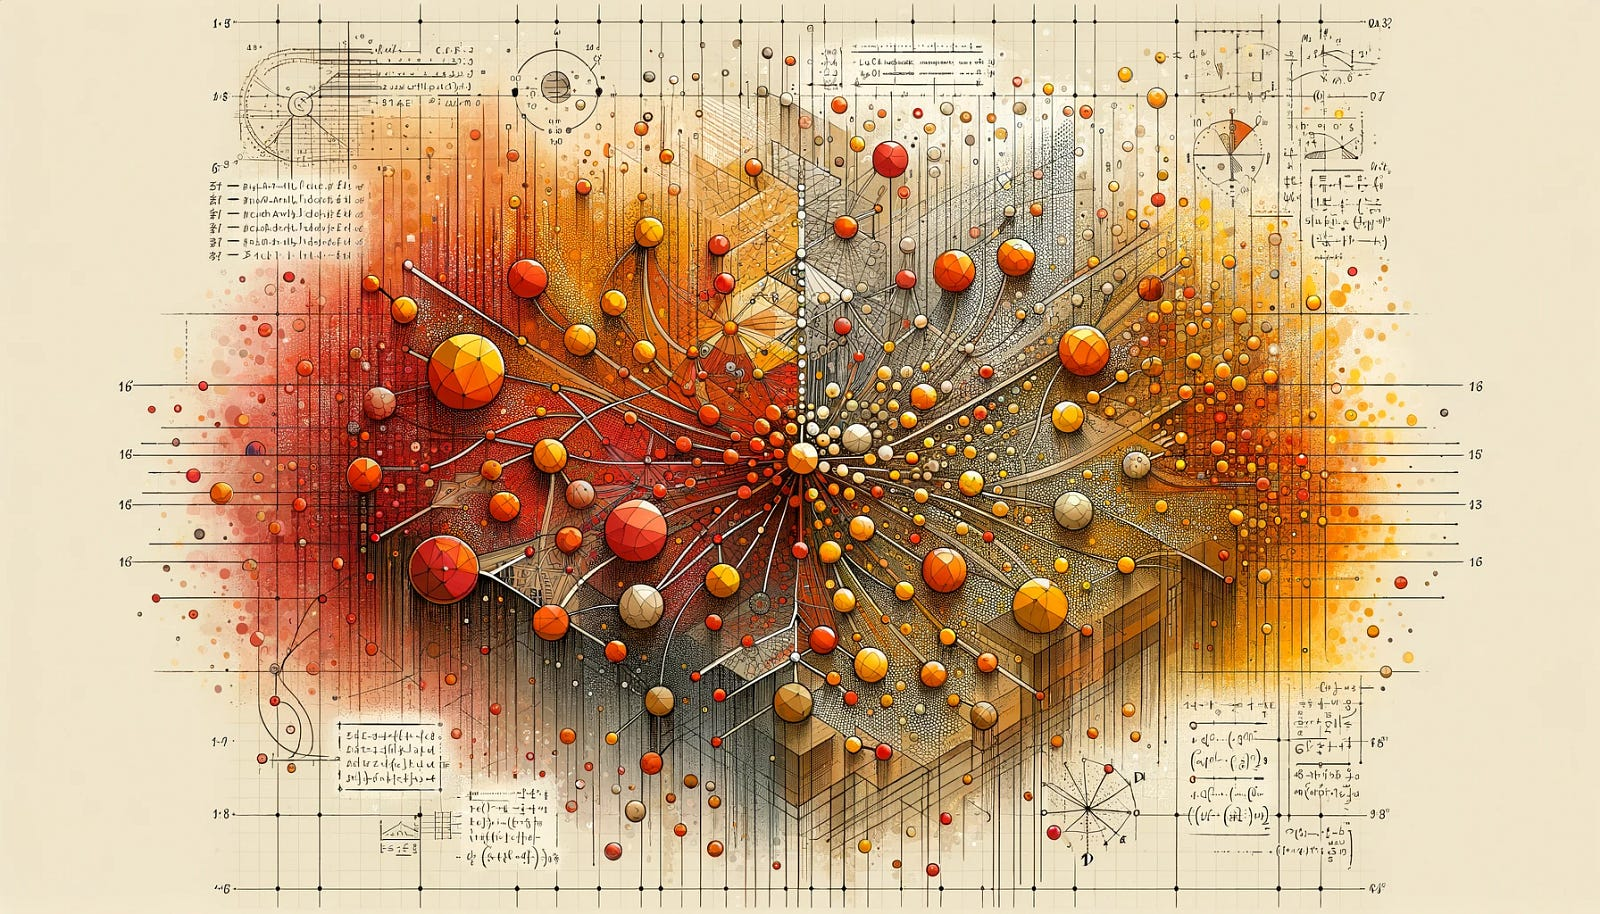

## **Import Required Libraries**

In [1]:
# Basic imports
import numpy as np
from collections import Counter

# Dataset imports
from sklearn.datasets import load_breast_cancer

# Visualization imports
import matplotlib.pyplot as plt

# Fine-tuning imports
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **KNN Classifier Class**

In [2]:
class KNN:
    """
    K-Nearest Neighbors classifier

    Parameters
    ----------
    k : int, default=3
        Number of neighbors to consider
    distance_metric : str, default='euclidean'
        The distance metric to use. Choose from 'euclidean', 'manhattan', 'minkowski'
    """
    def __init__(self, k=3, distance_metric='euclidean', method='classification'):
        self.k = k
        self.distance_metric = distance_metric
        self.method = method

    def _euclidean_distance(self, x1, x2):
        """
        Compute the Euclidean distance between two vectors

        Parameters
        ----------
        x1 : array-like
            A vector in the feature space
        x2 : array-like
            A vector in the feature space
        
        Returns
        -------
        float
            The Euclidean distance between x1 and x2
        """
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def _manhattan_distance(self, x1, x2):
        """
        Compute the Manhattan distance between two vectors

        Parameters
        ----------
        x1 : array-like
            A vector in the feature space
        x2 : array-like
            A vector in the feature space

        Returns
        -------
        float
            The Manhattan distance between x1 and x2
        """
        return np.sum(np.abs(x1 - x2))
    
    def _minkowski_distance(self, x1, x2):
        """
        Compute the Minkowski distance between two vectors

        Parameters
        ----------
        x1 : array-like
            A vector in the feature space
        x2 : array-like
            A vector in the feature space
        
        Returns
        -------
        float
            The Minkowski distance between x1 and x2
        """
        return np.sum(np.abs(x1 - x2)**self.k) ** (1/self.k)
    
    def fit(self, X, y):
        """
        Fit the model using X as training data and y as target values

        Parameters
        ----------
        X : array-like
            Training data
        y : array-like
            Target values
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predict the class labels for the provided data

        Parameters
        ----------
        X : array-like
            Data to be used for prediction
        
        Returns
        -------
        array-like
            Predicted class labels
        """
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        """
        Predict the class label for a single sample

        Parameters
        ----------
        x : array-like
            A single sample
        
        Returns
        -------
        int
            The predicted class label
        """
        # Compute distances between x and all examples in the training set
        if self.distance_metric == 'euclidean':
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [self._manhattan_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'minkowski':
            distances = [self._minkowski_distance(x, x_train) for x_train in self.X_train]
        else:
            raise ValueError("Invalid distance metric. Choose from 'euclidean', 'manhattan', 'minkowski'.")

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # return the most common class label
        if self.method == 'classification':
            most_common = Counter(k_nearest_labels).most_common(1)
        elif self.method == 'regression':
            most_common = np.mean(k_nearest_labels)
        return most_common[0][0]

## **Distance by Method**

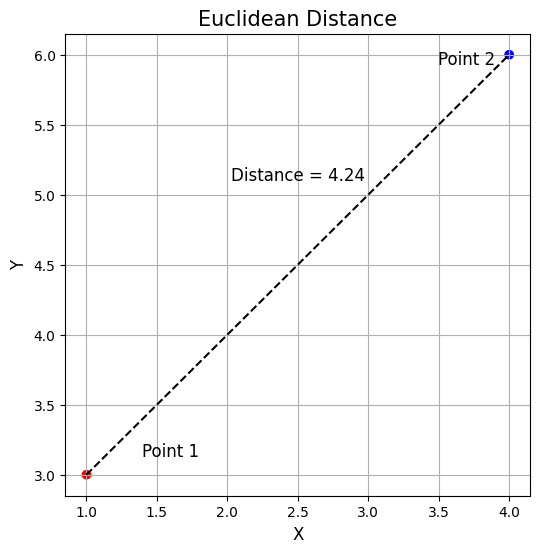

In [3]:
# Define two points
point1 = np.array([1, 3])
point2 = np.array([4, 6])

# Calculate Euclidean distance
euclidean_distance = np.sqrt(np.sum((point1 - point2)**2))

# Create scatter plot
plt.figure(figsize=(6,6))
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color=['red', 'blue'])
plt.text(point1[0]+0.8, point1[1]+0.1, 'Point 1', fontsize=12, ha='right', va='bottom')
plt.text(point2[0]-0.1, point2[1]-0.1, 'Point 2', fontsize=12, ha='right', va='bottom')

# Draw line between points
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k--')

# Annotate distance
mid_point = (point1 + point2) / 2
plt.text(mid_point[0], mid_point[1] + 0.6, f'Distance = {euclidean_distance:.2f}', fontsize=12, ha='center')

plt.title('Euclidean Distance', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True)
plt.show()

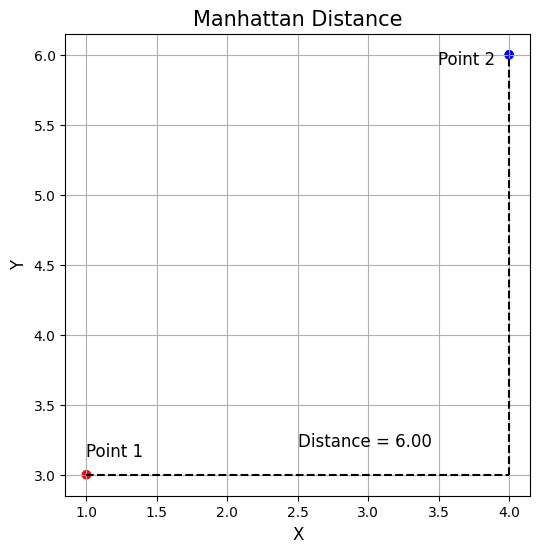

In [4]:
# Calculate Manhattan distance
manhattan_distance = np.sum(np.abs(point1 - point2))

# Create scatter plot
plt.figure(figsize=(6,6))
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color=['red', 'blue'])
plt.text(point1[0]+0.4, point1[1]+0.1, 'Point 1', fontsize=12, ha='right', va='bottom')
plt.text(point2[0]-0.1, point2[1]-0.1, 'Point 2', fontsize=12, ha='right', va='bottom')

# Draw path between points
plt.plot([point1[0], point2[0]], [point1[1], point1[1]], 'k--')
plt.plot([point2[0], point2[0]], [point1[1], point2[1]], 'k--')

# Annotate distance
mid_point_x = (point1[0] + point2[0]) / 2
plt.text(mid_point_x, point1[1]+0.2, f'Distance = {manhattan_distance:.2f}', fontsize=12, ha='left')

plt.title('Manhattan Distance', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True)
plt.show()

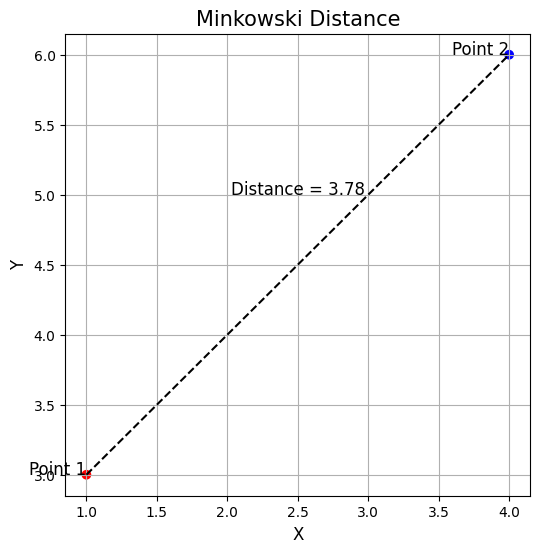

In [5]:
# Calculate Minkowski distance
p = 3
minkowski_distance = np.sum(np.abs(point1 - point2)**p)**(1/p)

# Create scatter plot
plt.figure(figsize=(6,6))
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color=['red', 'blue'])
plt.text(point1[0], point1[1], 'Point 1', fontsize=12, ha='right')
plt.text(point2[0], point2[1], 'Point 2', fontsize=12, ha='right')

# Draw path between points
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k--')

# Annotate distance
mid_point = (point1 + point2) / 2
plt.text(mid_point[0], mid_point[1]+0.5, f'Distance = {minkowski_distance:.2f}', fontsize=12, ha='center')

plt.title('Minkowski Distance', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True)
plt.show()

## **Load Breast Cancer Dataset**

In [6]:
df = load_breast_cancer()

# iris.data holds the input features
X = df.data

# iris.target holds the labels
y = df.target

## **Split Data**

In [7]:
split = 0.7
split_index = int(split * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

## **Normalize Data**

In [8]:
# Calculate the minimum and maximum of the training data
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)

# Normalize the training data
X_train_norm = (X_train - X_min) / (X_max - X_min)

# Normalize the test data
# Note: We use the minimum and maximum of the training data to normalize the test data
X_test_norm = (X_test - X_min) / (X_max - X_min)

## **Scatterplot by Distance Method (First two features)**

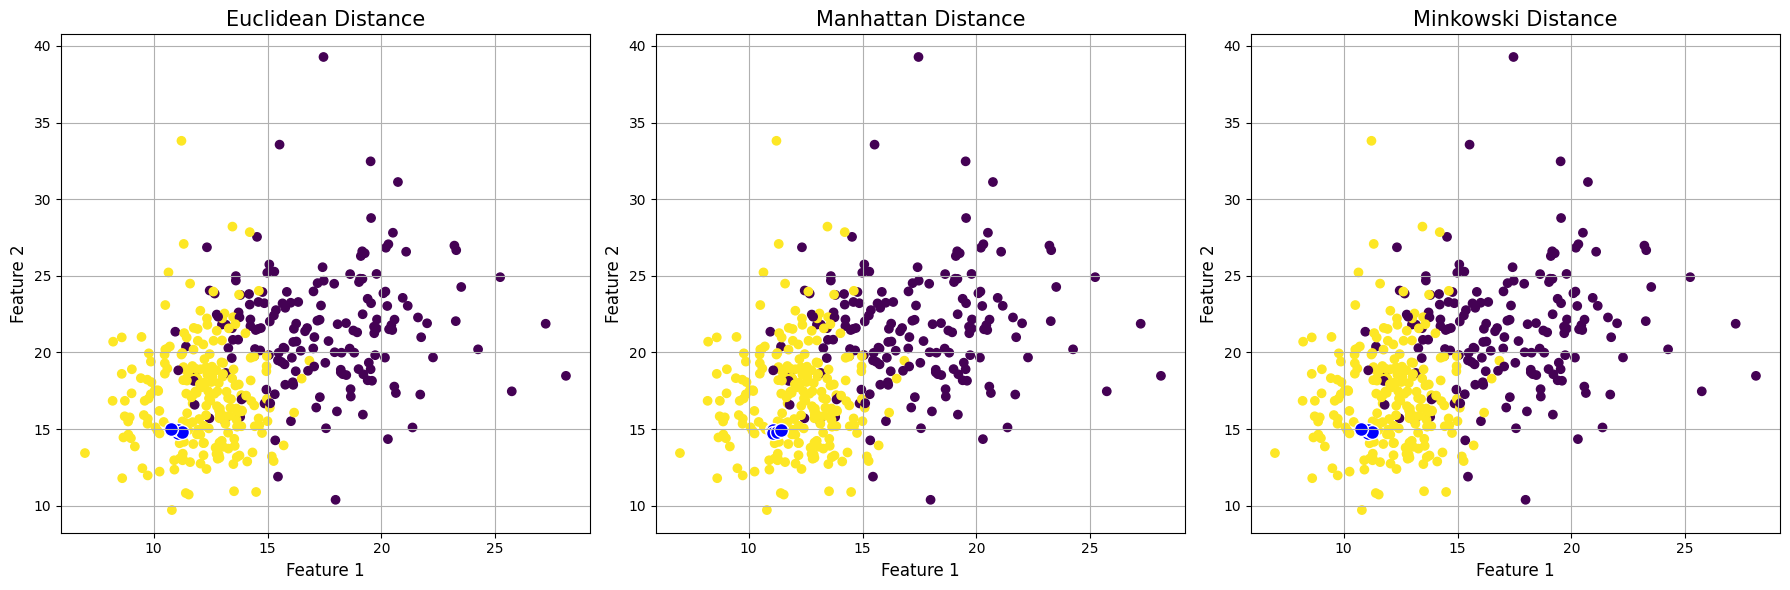

In [9]:
# Use only the first two features (for visualization)
X_subset = X_train[:, :2]
y_subset = y_train

# Choose a test point
test_point = X_test[0, :2]

# Fit the KNN model
knn = KNN(k=5, distance_metric='euclidean')
knn.fit(X_subset, y_subset)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of distance metrics
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

for ax, distance_metric in zip(axes, distance_metrics):
    # Fit the KNN model
    knn = KNN(k=5, distance_metric=distance_metric)
    knn.fit(X_subset, y_subset)

    # Compute distances between the test point and all points in the training set
    if distance_metric == 'euclidean':
        distances = [np.sqrt(np.sum((test_point - x)**2)) for x in X_subset]
    elif distance_metric == 'manhattan':
        distances = [np.sum(np.abs(test_point - x)) for x in X_subset]
    elif distance_metric == 'minkowski':
        distances = [np.sum(np.abs(test_point - x)**knn.k) ** (1/knn.k) for x in X_subset]

    # Get the indices of the 5 nearest neighbors
    nn_indices = np.argsort(distances)[:5]

    # Plot the data points
    ax.scatter(X_subset[:, 0], X_subset[:, 1], c=y_subset, cmap='viridis')

    # Highlight the test point
    ax.scatter(test_point[0], test_point[1], color='red')

    # Highlight the nearest neighbors
    ax.scatter(X_subset[nn_indices, 0], X_subset[nn_indices, 1], color='blue', edgecolor='white', s=100)

    ax.set_title(f'{distance_metric.capitalize()} Distance', fontsize=15)
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)
    ax.grid(True)

plt.tight_layout()
plt.show()

## **Plot Error Rate by K**

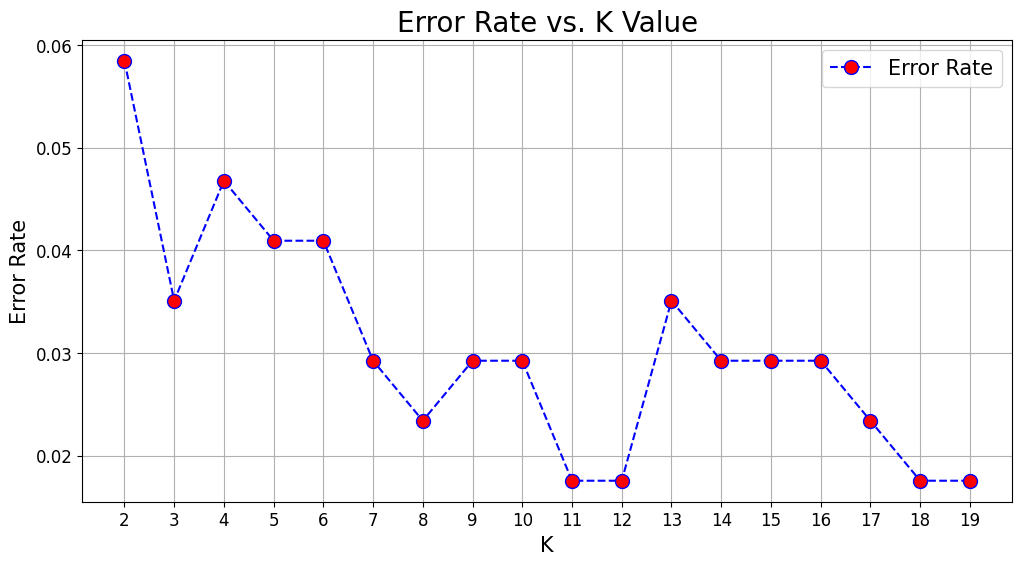

In [10]:
error_rate = []

for i in range(2,20):
    
    knn = KNN(k=i)
    knn.fit(X_train_norm, y_train)
    pred_i = knn.predict(X_test_norm)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(2,20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10, label='Error Rate')
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=15)
plt.ylabel('Error Rate', fontsize=15)
plt.xticks(np.arange(2, 20, step=1), fontsize=12)  # Set x-ticks to be integers from 2 to 20
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=15)

## **Predict Data with 11 Neighbors**

In [11]:
knn = KNN(k=11, distance_metric='euclidean')
knn.fit(X_train_norm, y_train)
predictions = knn.predict(X_test_norm)

accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 98.25%


## **Fine-Tune using Optuna**

In [12]:
def objective(trial):
    k = trial.suggest_int('k', 1, 20)
    distance_metric = trial.suggest_categorical('distance_metric', ['euclidean', 'manhattan', 'minkowski'])
    knn = KNN(k=k, distance_metric=distance_metric)
    knn.fit(X_train_norm, y_train)
    predictions = knn.predict(X_test_norm)
    accuracy = np.mean(predictions == y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_k = best_params['k']
best_distance_metric = best_params['distance_metric']
print(f'Best K: {best_k}')
print(f'Best Distance Metric: {best_distance_metric}')

Best K: 7
Best Distance Metric: manhattan


In [13]:
knn = KNN(k=best_k, distance_metric=best_distance_metric)
knn.fit(X_train_norm, y_train)
predictions = knn.predict(X_test_norm)
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 99.42%
